In [5]:
from classy import Class
import numpy as np
cosmo = Class()

In [20]:
alpha_B_arr=np.linspace(0.,2, 50)
w_a_arr=np.linspace(0, 1, 50)
cosmo.empty()
cosmo.struct_cleanup()
w_array =[]
y_array=[]
s8_array=[]

fixed_params =  {'gravity_model': 'propto_omega', 'Omega_smg': -1, 'Omega_Lambda': 0, 'Omega_fld': 0, 'expansion_model': 'wowa','output': 'mPk' }
cosmo.set(fixed_params)
w_a=-1
alpha_B = 1.0
# for w_a in w_a_arr:
#     for alpha_B in alpha_B_arr:
#         w_a = w_a_arr[i]
#         w_a = 0.
expansion_smg = [0.5, -1., w_a]
#       alpha_B = alpha_B_arr[i]
#alpha_B = 1.
parameters_smg = [1, alpha_B, 0, 0, 1]
# params ={'parameters_smg': str(parameters_smg).strip('[]')}
#params =  {'gravity_model': 'propto_omega', 'parameters_smg': str(parameters_smg).strip('[]'), 'Omega_smg': -1, 'Omega_Lambda': 0, 'Omega_fld': 0, 'expansion_model': 'wowa', 'expansion_smg' : str(expansion_smg).strip('[]'),'output': 'mPk' }
varied_params = {'parameters_smg': str(parameters_smg).strip('[]'), 'expansion_smg' : str(expansion_smg).strip('[]')}
cosmo.set(varied_params)
cosmo.pk?


w_array.append(w_a)
y_array.append(alpha_B)
s8_array.append(cosmo.sigma8())
# print(cosmo.pars)

#print(cosmo.sigma8())
cosmo.struct_cleanup()  




In [5]:
# np.save('wa', w_array)
# np.save('alpha_B', y_array)
# np.save('s8',s8_array)
wa = np.load('wa.npy')
y_array = np.load('alpha_B.npy')
s8_array=  np.load('s8.npy')

AttributeError: module 'matplotlib.pyplot' has no attribute 'zlabel'

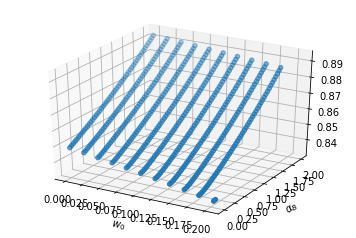

In [10]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(w_array,y_array,s8_array)
plt.xlabel(r'$w_0$')
plt.ylabel(r'$\alpha_B$')
plt.zlabel(r'$\sigma_8$')
plt.show()

In [11]:
# '''
# ===========================
# More triangular 3D surfaces
# ===========================

# Two additional examples of plotting surfaces with triangular mesh.

# The first demonstrates use of plot_trisurf's triangles argument, and the
# second sets a Triangulation object's mask and passes the object directly
# to plot_trisurf.
# '''

# import numpy as np
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
# import matplotlib.tri as mtri


# fig = plt.figure(figsize=plt.figaspect(0.5))

# #============
# # First plot
# #============

# # Make a mesh in the space of parameterisation variables u and v

# w_a, alpha_B = np.meshgrid(w_a, alpha_B)
# w_a, alpha_B = w_a.flatten(), alpha_B.flatten()

# # print(w_a)
# # This is the Mobius mapping, taking a u, v pair and returning an x, y, z
# # triple
# x = w_a
# y = alpha_B
# print(len(w_a), len(alpha_B), len(z))
# # z = 0.5 * v * np.sin(u / 2.0)

# # Triangulate parameter space to determine the triangles
# tri = mtri.Triangulation(w_a, alpha_B)

# # Plot the surface.  The triangles in parameter space determine which x, y, z
# # points are connected by an edge.
# ax = fig.add_subplot(1, 2, 1, projection='3d')
# ax.plot_trisurf(x, y, z, triangles=tri.triangles, cmap=plt.cm.Spectral)
# ax.set_zlim(-1, 1)


# #============
# # Second plot
# #============

# Make parameter spaces radii and angles.
n_angles = 36
n_radii = 8
min_radius = 0.25
# radii = np.linspace(min_radius, 0.95, n_radii)

# angles = np.linspace(0, 2*np.pi, n_angles, endpoint=False)
# angles = np.repeat(angles[..., np.newaxis], n_radii, axis=1)
# angles[:, 1::2] += np.pi/n_angles

# # Map radius, angle pairs to x, y, z points.
# x = (radii*np.cos(angles)).flatten()
# y = (radii*np.sin(angles)).flatten()
# z = (np.cos(radii)*np.cos(angles*3.0)).flatten()

# Create the Triangulation; no triangles so Delaunay triangulation created.
triang = mtri.Triangulation(x, y)

# Mask off unwanted triangles.
xmid = x[triang.triangles].mean(axis=1)
ymid = y[triang.triangles].mean(axis=1)
mask = np.where(xmid**2 + ymid**2 < min_radius**2, 1, 0)
triang.set_mask(mask)

# Plot the surface.
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.plot_trisurf(triang, z, cmap=plt.cm.CMRmap)


plt.show()


ValueError: x and y arrays must have a length of at least 3